<a href="https://colab.research.google.com/github/mattanova/ELE6310E-Assignments/blob/main/HW2_Q2_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uploading files and installing timeloop/accelergy**


In [1]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
!unzip A2.zip

In [ ]:
import sys
import os
import shutil
import warnings

!pip install -qr /content/A2/requirements.txt

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
    warnings.warn('CUDA is not available.')

In [ ]:
!source /content/A2/install_timeloop/install_timeloop.sh
!export PATH=$PATH:~/.local/bin
!cp ~/.local/bin/timeloop* /usr/bin/
!cp ~/ENV/bin/accelergy* /usr/bin/

In [ ]:
# make sure timeloop executables can be found
!which -a timeloop-model
# make sure accelergy executable can be found
!which -a accelergy

In [18]:
if '/content/A2/common' not in sys.path:
    sys.path.insert(0, '/content/A2/common')

In [ ]:
%cd /content/A2

In [23]:
from common.utils import *

# **Sweeping across different memory configs**

In [ ]:
%cd /content/A2/Q2

In [51]:
# defining the sweep range
start_value = 16
finish_value = 2048
values = [start_value * 2**i for i in range(int(finish_value.bit_length() - start_value.bit_length()) + 1)]

In [52]:
sweep_data_read = []
sweep_data_write = []
# calculating the energy stats for each case using timeloop
for width in values:
    YAML_generator(component_class="SRAM", depth=8192 , width=width, path="arch_base.yaml")
    !timeloop-model arch.yaml  prob.yaml  map.yaml > /dev/null 2>&1
    energy_read, energy_write = YAML_parser(path="timeloop-model.ERT_summary.yaml")
    sweep_data_read.append(energy_read)
    sweep_data_write.append(energy_write)

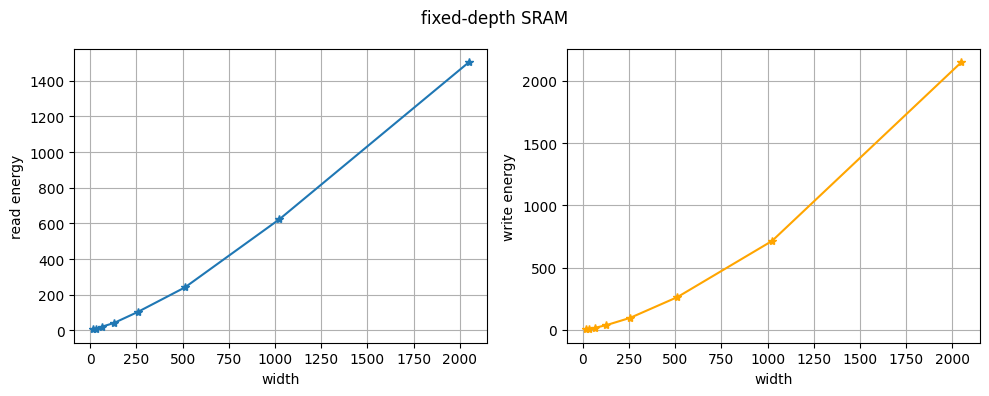

In [53]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# read plot
axs[0].plot(values, sweep_data_read, marker='*', linestyle='-')
axs[0].set_xlabel('width')
axs[0].set_ylabel('read energy')
axs[0].grid(True)

# write plot
axs[1].plot(values, sweep_data_write,  marker='*', linestyle='-', color='orange')
axs[1].set_xlabel('width')
axs[1].set_ylabel('write energy')
axs[1].grid(True)

fig.suptitle('fixed-depth SRAM')
plt.tight_layout()
plt.show()